In [1]:
import os
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
sns.set()

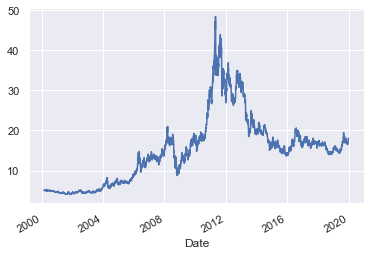

In [2]:
from pandas_datareader import data
# Only get the adjusted close.
rawData = data.DataReader("SI=F", 
                       start='2000-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')

rawData['Open'].plot()

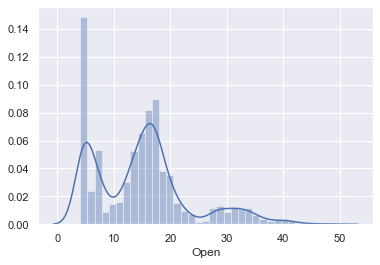

In [3]:
sns.distplot(rawData['Open'])

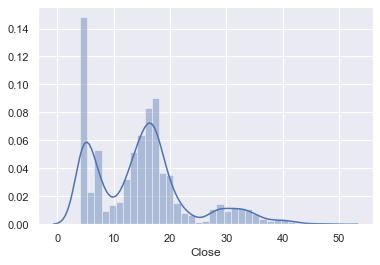

In [4]:
sns.distplot(rawData['Close'])

In [5]:
rawData['0.5(O+C)'] = ( rawData['Open'] + rawData['Close'] ) * 0.5
rawData['0.5(H+L)'] = ( rawData['High'] + rawData['Low'] ) * 0.5
rawData['0.25(O+C)(H+L)'] = rawData['0.5(O+C)'] * rawData['0.5(H+L)']
rawData.head()

,High,Low,Open,Close,Volume,Adj Close,0.5(O+C),0.5(H+L),0.25(O+C)(H+L)
Date,,,,,,,,,
2000-02-28,5.095,5.020,5.045,5.048,14203.0,5.048,5.0465,5.0575,25.522673
2000-02-29,5.090,5.035,5.065,5.048,2830.0,5.048,5.0565,5.0625,25.598531
2000-03-01,5.130,5.050,5.070,5.073,511.0,5.073,5.0715,5.0900,25.813936
2000-03-02,5.105,5.000,5.105,5.008,645.0,5.008,5.0565,5.0525,25.547966
2000-03-03,5.110,5.000,5.020,5.099,307.0,5.099,5.0595,5.0550,25.575773


In [10]:
extract  = pd.DataFrame(data = { 'Open' : rawData['Open'][1:len(rawData)].to_numpy(), 'AvOC' : rawData['0.5(O+C)'][ : len(rawData) - 1].to_numpy(), 'AvHL' : rawData['0.5(H+L)'][ : len(rawData) - 1].to_numpy(), 'AvOC-HL' : rawData['0.25(O+C)(H+L)'][ : len(rawData) - 1].to_numpy() })
extract.head()

,Open,AvOC,AvHL,AvOC-HL
0,5.065,5.0465,5.0575,25.522673
1,5.070,5.0565,5.0625,25.598531
2,5.105,5.0715,5.0900,25.813936
3,5.020,5.0565,5.0525,25.547966
4,5.090,5.0595,5.0550,25.575773


In [9]:
x = extract['AvOC-HL'] * 0.5
y = extract['Open']
x1 = sm.add_constant(x)
result = sm.OLS(y, x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 5.017e+04
Date:                Mon, 11 May 2020   Prob (F-statistic):               0.00
Time:                        14:54:52   Log-Likelihood:                -11670.
No. Observations:                4948   AIC:                         2.334e+04
Df Residuals:                    4946   BIC:                         2.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7380      0.049    158.706      0.000       7.642       7.834
AvOC-HL        0.0488      0.000    223.991      0.000       0.048       0.049
==============================================================================
Omnibus:                      638.060   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.310
Skew:                          -0.963   Prob(JB):                    1.60e-202
Kurtosis:                       3.893   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

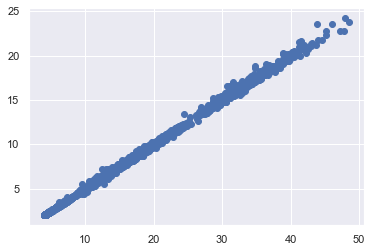

In [8]:
plt.scatter(y,x)